In [1]:
 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [2]:
import pandas as pd
column_names = ['genre', 'acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']
df=pd.read_csv("SpotifyFeatures.csv", usecols=column_names)

genres_to_drop = [
    'Anime', 'Dance', "Children’s Music", 'Movie', 'A Capella', 
    'Soundtrack', 'Opera', 'World', "Children's Music", 'Ska', 'Folk', 'Indie', 'R&B', 'Reggae', 'Alternative', 'Blues', 'Rap', 'Soul', 'Jazz', 'Pop', 'Electronic', 'Country', 'Hip-Hop'
]

# Drop rows where genre is in genres_to_drop list
df = df[~df['genre'].isin(genres_to_drop)]
display(list(set(df['genre'])))


['Comedy', 'Classical', 'Rock', 'Reggaeton']

In [3]:
valid_genres = ['Classical', 'Reggaeton', 'Rock']

# Replace genres that are not in the valid list with a new value
df.loc[~df['genre'].isin(valid_genres), 'genre'] = 'Other'
df.head()

,genre,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
104022,Classical,0.900,0.257,0.10900,0.0762,-21.356,0.0597,75.020,0.3070
104023,Classical,0.992,0.196,0.00687,0.1060,-34.255,0.0442,72.125,0.0530
104024,Classical,0.982,0.194,0.03240,0.0916,-28.215,0.0382,144.130,0.0596
104025,Classical,0.995,0.184,0.00527,0.1730,-37.264,0.0432,170.612,0.1510
104026,Classical,0.995,0.228,0.00385,0.0858,-35.213,0.0449,141.201,0.1170


In [4]:
df.shape
display(list(set(df['genre'])))

['Other', 'Classical', 'Rock', 'Reggaeton']

In [5]:
frequencies = pd.DataFrame()
genres = list(set(df['genre']))
repetition = []
for genre in genres:
    repetition.append(len(df[df['genre'] == str(genre)]))
frequencies['Genres'] = genres
frequencies['Repetitions'] = repetition
display(frequencies)

,Genres,Repetitions
0,Other,9681
1,Classical,9256
2,Rock,9272
3,Reggaeton,8927


<Axes: xlabel='count', ylabel='genre'>

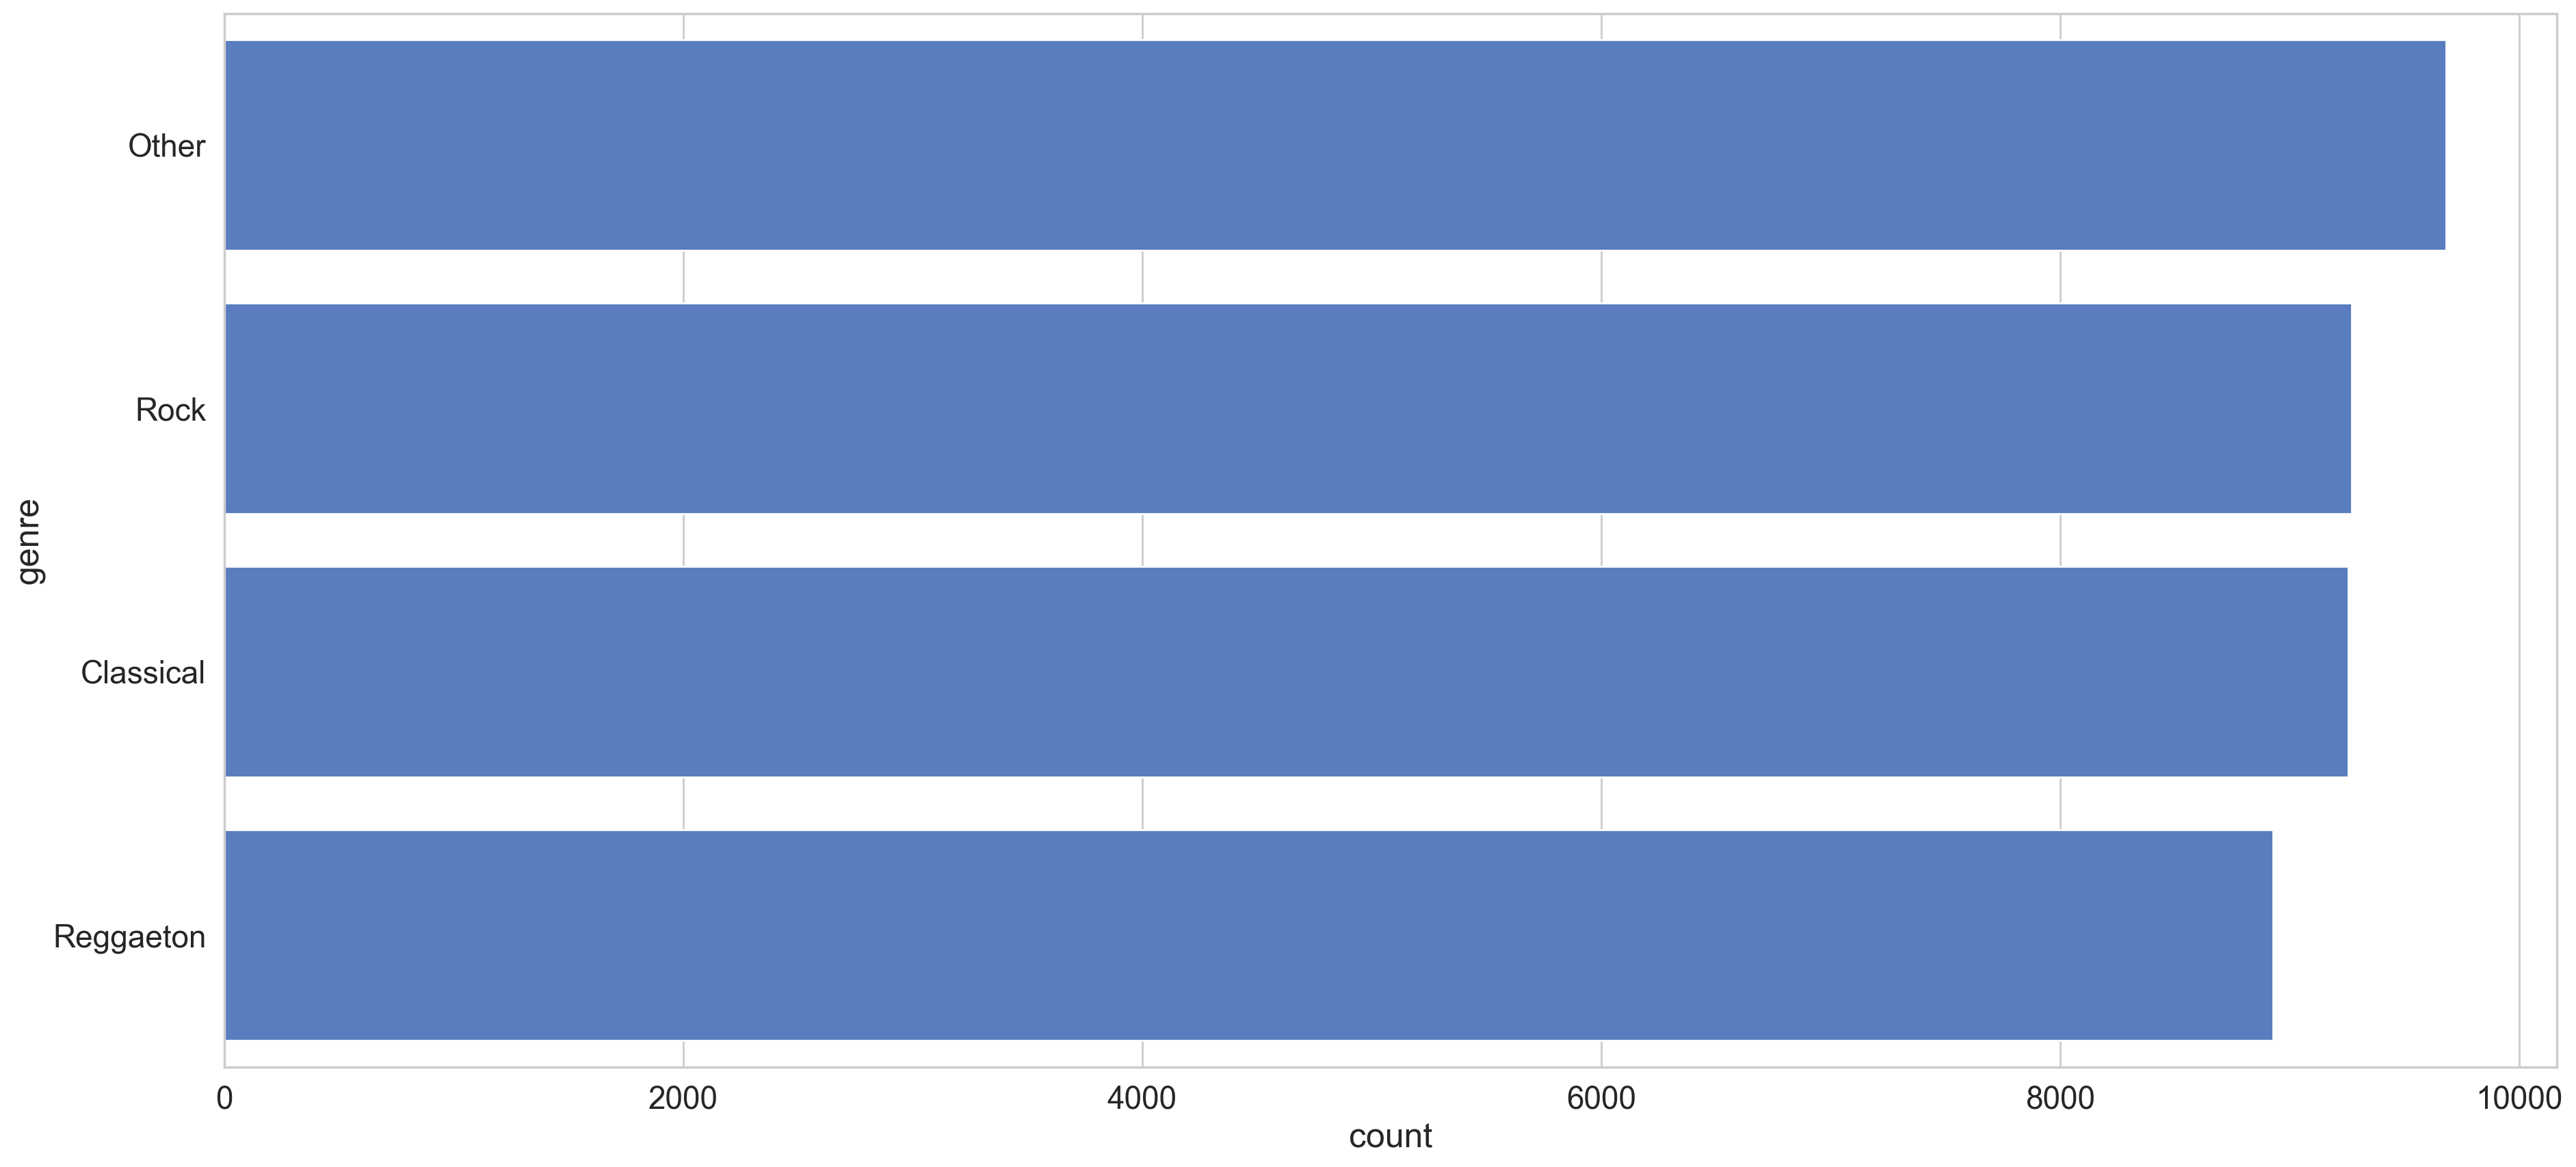

In [6]:
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)


In [7]:
# genres = [
#  'Hip-Hop',
#  'Jazz',
#  'Soundtrack',
#  'Comedy',
#  'Reggaeton',
#  'Rock'
#  ]
genres = [
    'Classical',
    'Reggaeton',
    'Rock',
    'Others',
]
# df = df[df.genre.isin(genres)]
display(df)

,genre,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
104022,Classical,0.9000,0.257,0.10900,0.0762,-21.356,0.0597,75.020,0.3070
104023,Classical,0.9920,0.196,0.00687,0.1060,-34.255,0.0442,72.125,0.0530
104024,Classical,0.9820,0.194,0.03240,0.0916,-28.215,0.0382,144.130,0.0596
104025,Classical,0.9950,0.184,0.00527,0.1730,-37.264,0.0432,170.612,0.1510
104026,Classical,0.9950,0.228,0.00385,0.0858,-35.213,0.0449,141.201,0.1170
...,...,...,...,...,...,...,...,...,...
226503,Rock,0.6700,0.718,0.59300,0.1720,-9.976,0.0377,124.251,0.8690
226504,Rock,0.0340,0.521,0.93300,0.3300,-4.874,0.1790,169.842,0.6070
226505,Rock,0.6710,0.618,0.76900,0.2760,-4.642,0.0309,111.978,0.6070
226506,Rock,0.0543,0.681,0.66200,0.2060,-6.526,0.1150,149.485,0.8500


In [8]:
display(genres.__len__())

4

In [9]:
def plot_activity(gen, df):
    data = df[df['genre'] == gen][['acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),
                     title=gen)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

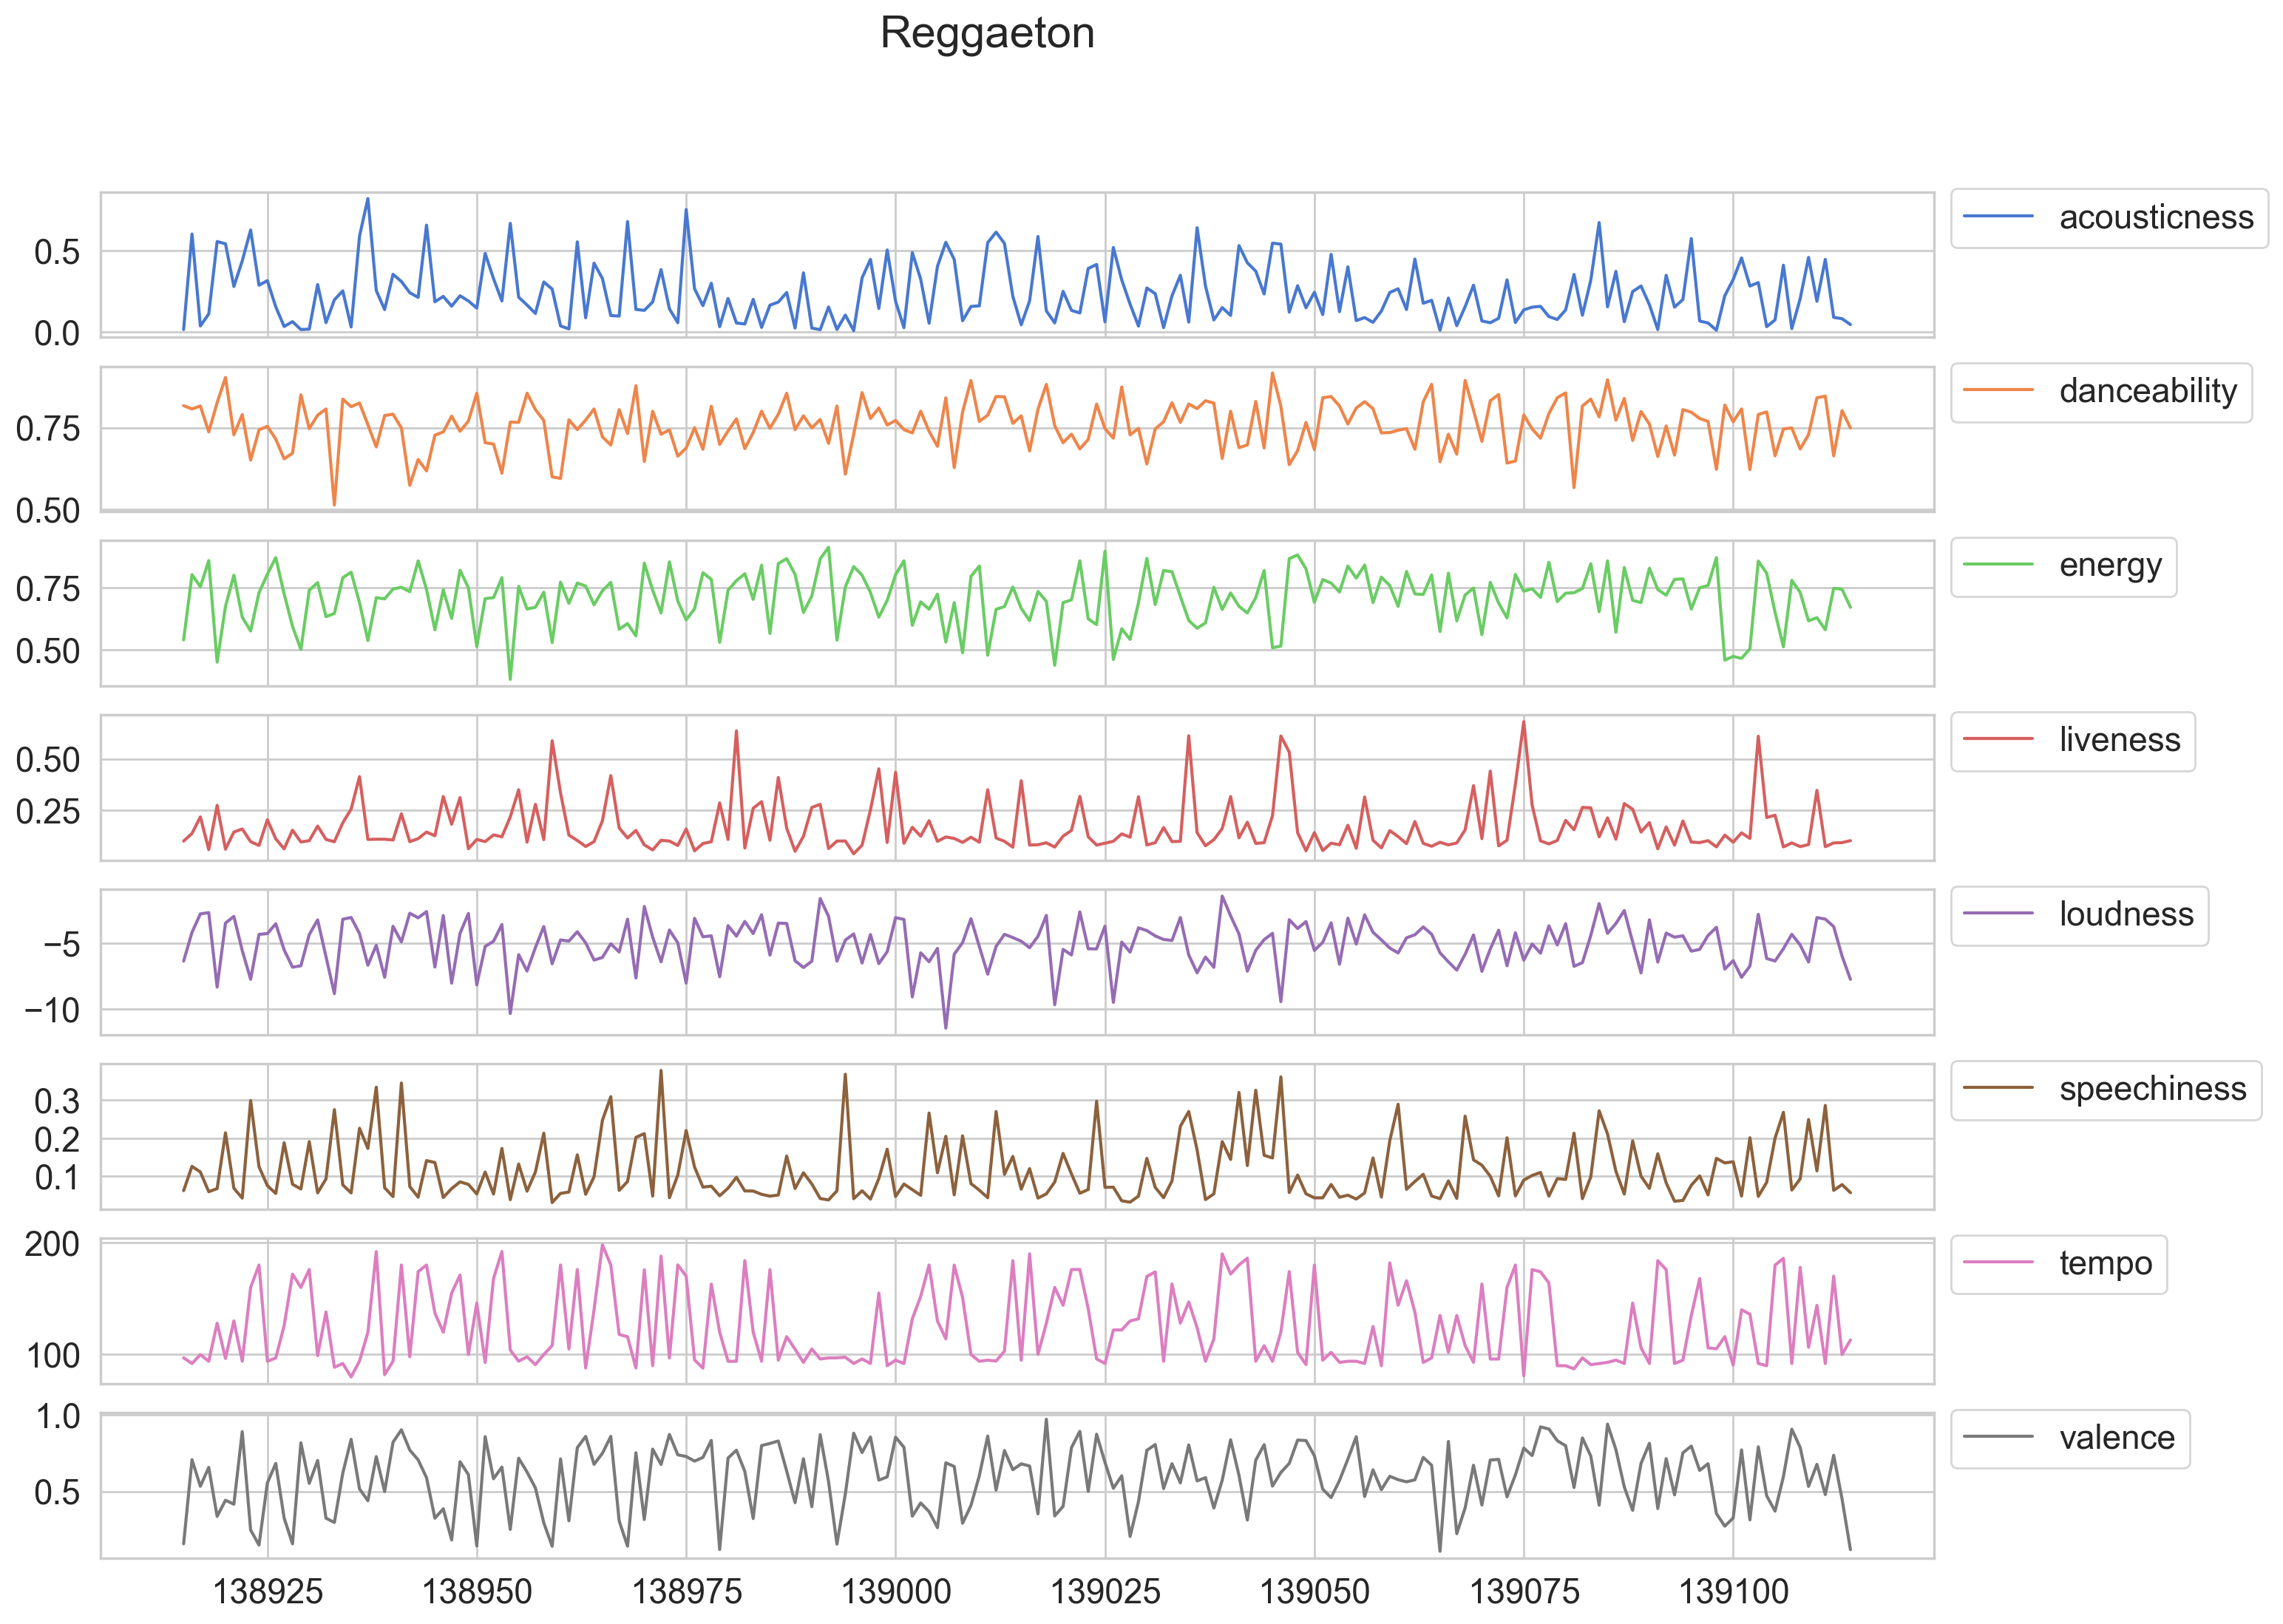

In [10]:
# plot_activity('Classical', df)
# plot_activity('Rock', df)
plot_activity('Reggaeton', df)
# plot_activity('Others', df)


# plot_activity('Anime', df)
# plot_activity('Soundtrack', df)
# plot_activity('World', df)

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df,test_size=0.2, random_state=42)

train_features,train_labels = train[['acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']],train['genre']
test_features,test_labels = test[['acousticness','danceability','energy','liveness','loudness','speechiness', 'tempo',	'valence']],test['genre']


In [12]:
display(type(test_features))
display(test_features)

pandas.core.frame.DataFrame

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence
173035,0.832,0.660,0.5900,0.6630,-10.256,0.9140,134.275,0.457
154779,0.149,0.600,0.5460,0.0846,-7.744,0.0811,164.056,0.668
168232,0.631,0.525,0.4460,0.9500,-13.280,0.9040,77.342,0.394
125854,0.905,0.463,0.4500,0.1630,-10.738,0.0410,97.821,0.168
169142,0.750,0.634,0.8260,0.7520,-11.228,0.9460,111.984,0.334
...,...,...,...,...,...,...,...,...
162326,0.077,0.777,0.8090,0.2680,-3.049,0.1850,172.058,0.722
124316,0.957,0.196,0.0755,0.7100,-21.435,0.0534,71.146,0.100
127628,0.935,0.335,0.1600,0.1070,-21.807,0.0480,119.426,0.355
165128,0.487,0.684,0.8340,0.0862,-6.200,0.0333,94.019,0.742


In [13]:
train_labels.shape

(29708,)

In [14]:
test_features.shape

(7428, 8)

In [15]:
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)


In [16]:
display(list(set(test_labels_encoded)))

[0, 1, 2, 3]

In [17]:
model = keras.Sequential()


model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(8,)))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

c:\Users\Jadge\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = model.fit(
    train_features, train_labels_encoded,
    epochs=20,
    batch_size=50,
    validation_split=0.2,
    shuffle=True
)


Epoch 1/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5204 - loss: 1.4997 - val_accuracy: 0.7642 - val_loss: 0.5420
Epoch 2/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7514 - loss: 0.5699 - val_accuracy: 0.8018 - val_loss: 0.4563
Epoch 3/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7943 - loss: 0.4910 - val_accuracy: 0.8108 - val_loss: 0.4370
Epoch 4/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8152 - loss: 0.4527 - val_accuracy: 0.8378 - val_loss: 0.3953
Epoch 5/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8342 - loss: 0.4202 - val_accuracy: 0.8575 - val_loss: 0.3667
Epoch 6/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8401 - loss: 0.4074 - val_accuracy: 0.8600 - val_loss: 0.3572
Epoch 7/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8481 - loss: 0.3948 - val_accuracy: 0.8561 - val_loss: 0.3573
Epoch 8/20
476/476 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8525 - loss: 0.3857 - val_accuracy: 0.

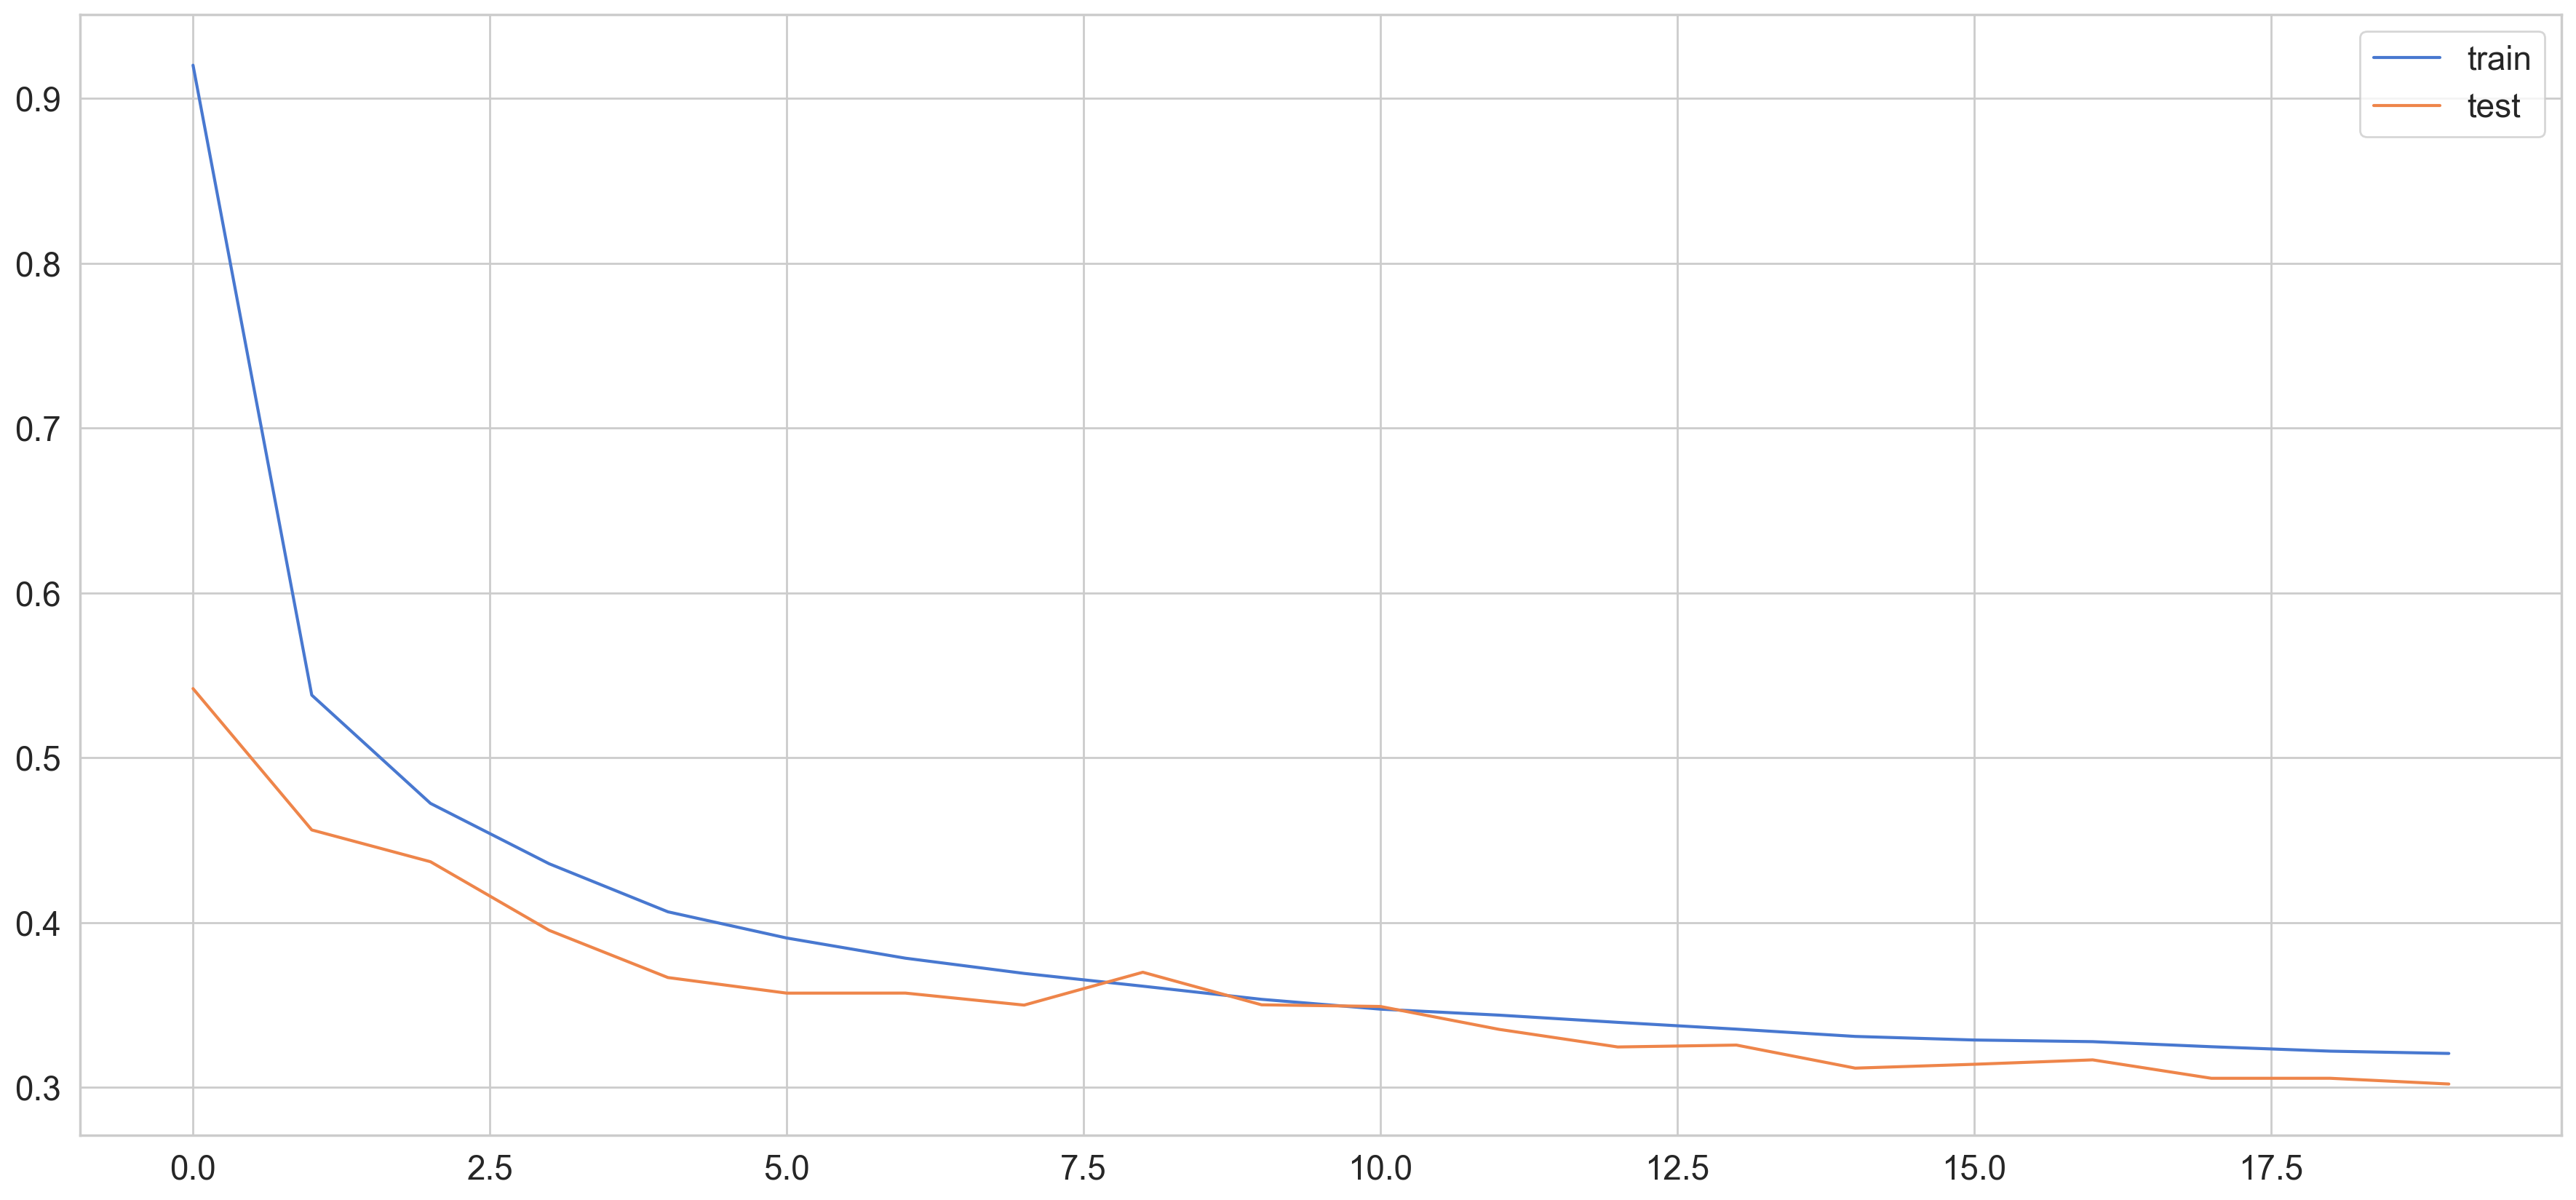

In [19]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [20]:
test_loss, test_acc = model.evaluate(test_features,test_labels_encoded,verbose=2)

233/233 - 0s - 756us/step - accuracy: 0.8844 - loss: 0.3184


In [21]:
predictions = model.predict(test_features)

233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


In [22]:
predicts = pd.DataFrame(predictions)

In [23]:
predicts.columns = genres
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))


predicts['Label'] = predict

In [24]:
predicts['Real'] = list(test_labels_encoded.copy())
predicts['Value'] = list(label_encoder.inverse_transform(test_labels_encoded))

In [25]:
pd.set_option('display.max_columns', None)
print(predicts)

      Classical  Reggaeton          Rock        Others  Label  Real      Value
0      0.000008   0.999865  1.230629e-04  4.148907e-06      1     1      Other
1      0.005731   0.012358  5.598163e-01  4.220953e-01      2     3       Rock
2      0.000008   0.999992  1.123531e-07  5.805964e-08      1     1      Other
3      0.358391   0.119911  1.879574e-02  5.029019e-01      3     0  Classical
4      0.000008   0.999966  2.454426e-05  1.550930e-06      1     1      Other
...         ...        ...           ...           ...    ...   ...        ...
7423   0.000095   0.001152  9.762672e-01  2.248485e-02      2     2  Reggaeton
7424   0.995657   0.002108  2.361640e-07  2.234592e-03      0     0  Classical
7425   0.984459   0.001366  2.765464e-06  1.417232e-02      0     0  Classical
7426   0.004817   0.028920  5.620807e-01  4.041824e-01      2     2  Reggaeton
7427   0.000146   0.009708  9.327406e-01  5.740536e-02      2     2  Reggaeton

[7428 rows x 7 columns]


In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(test_labels_encoded.copy()),predict)

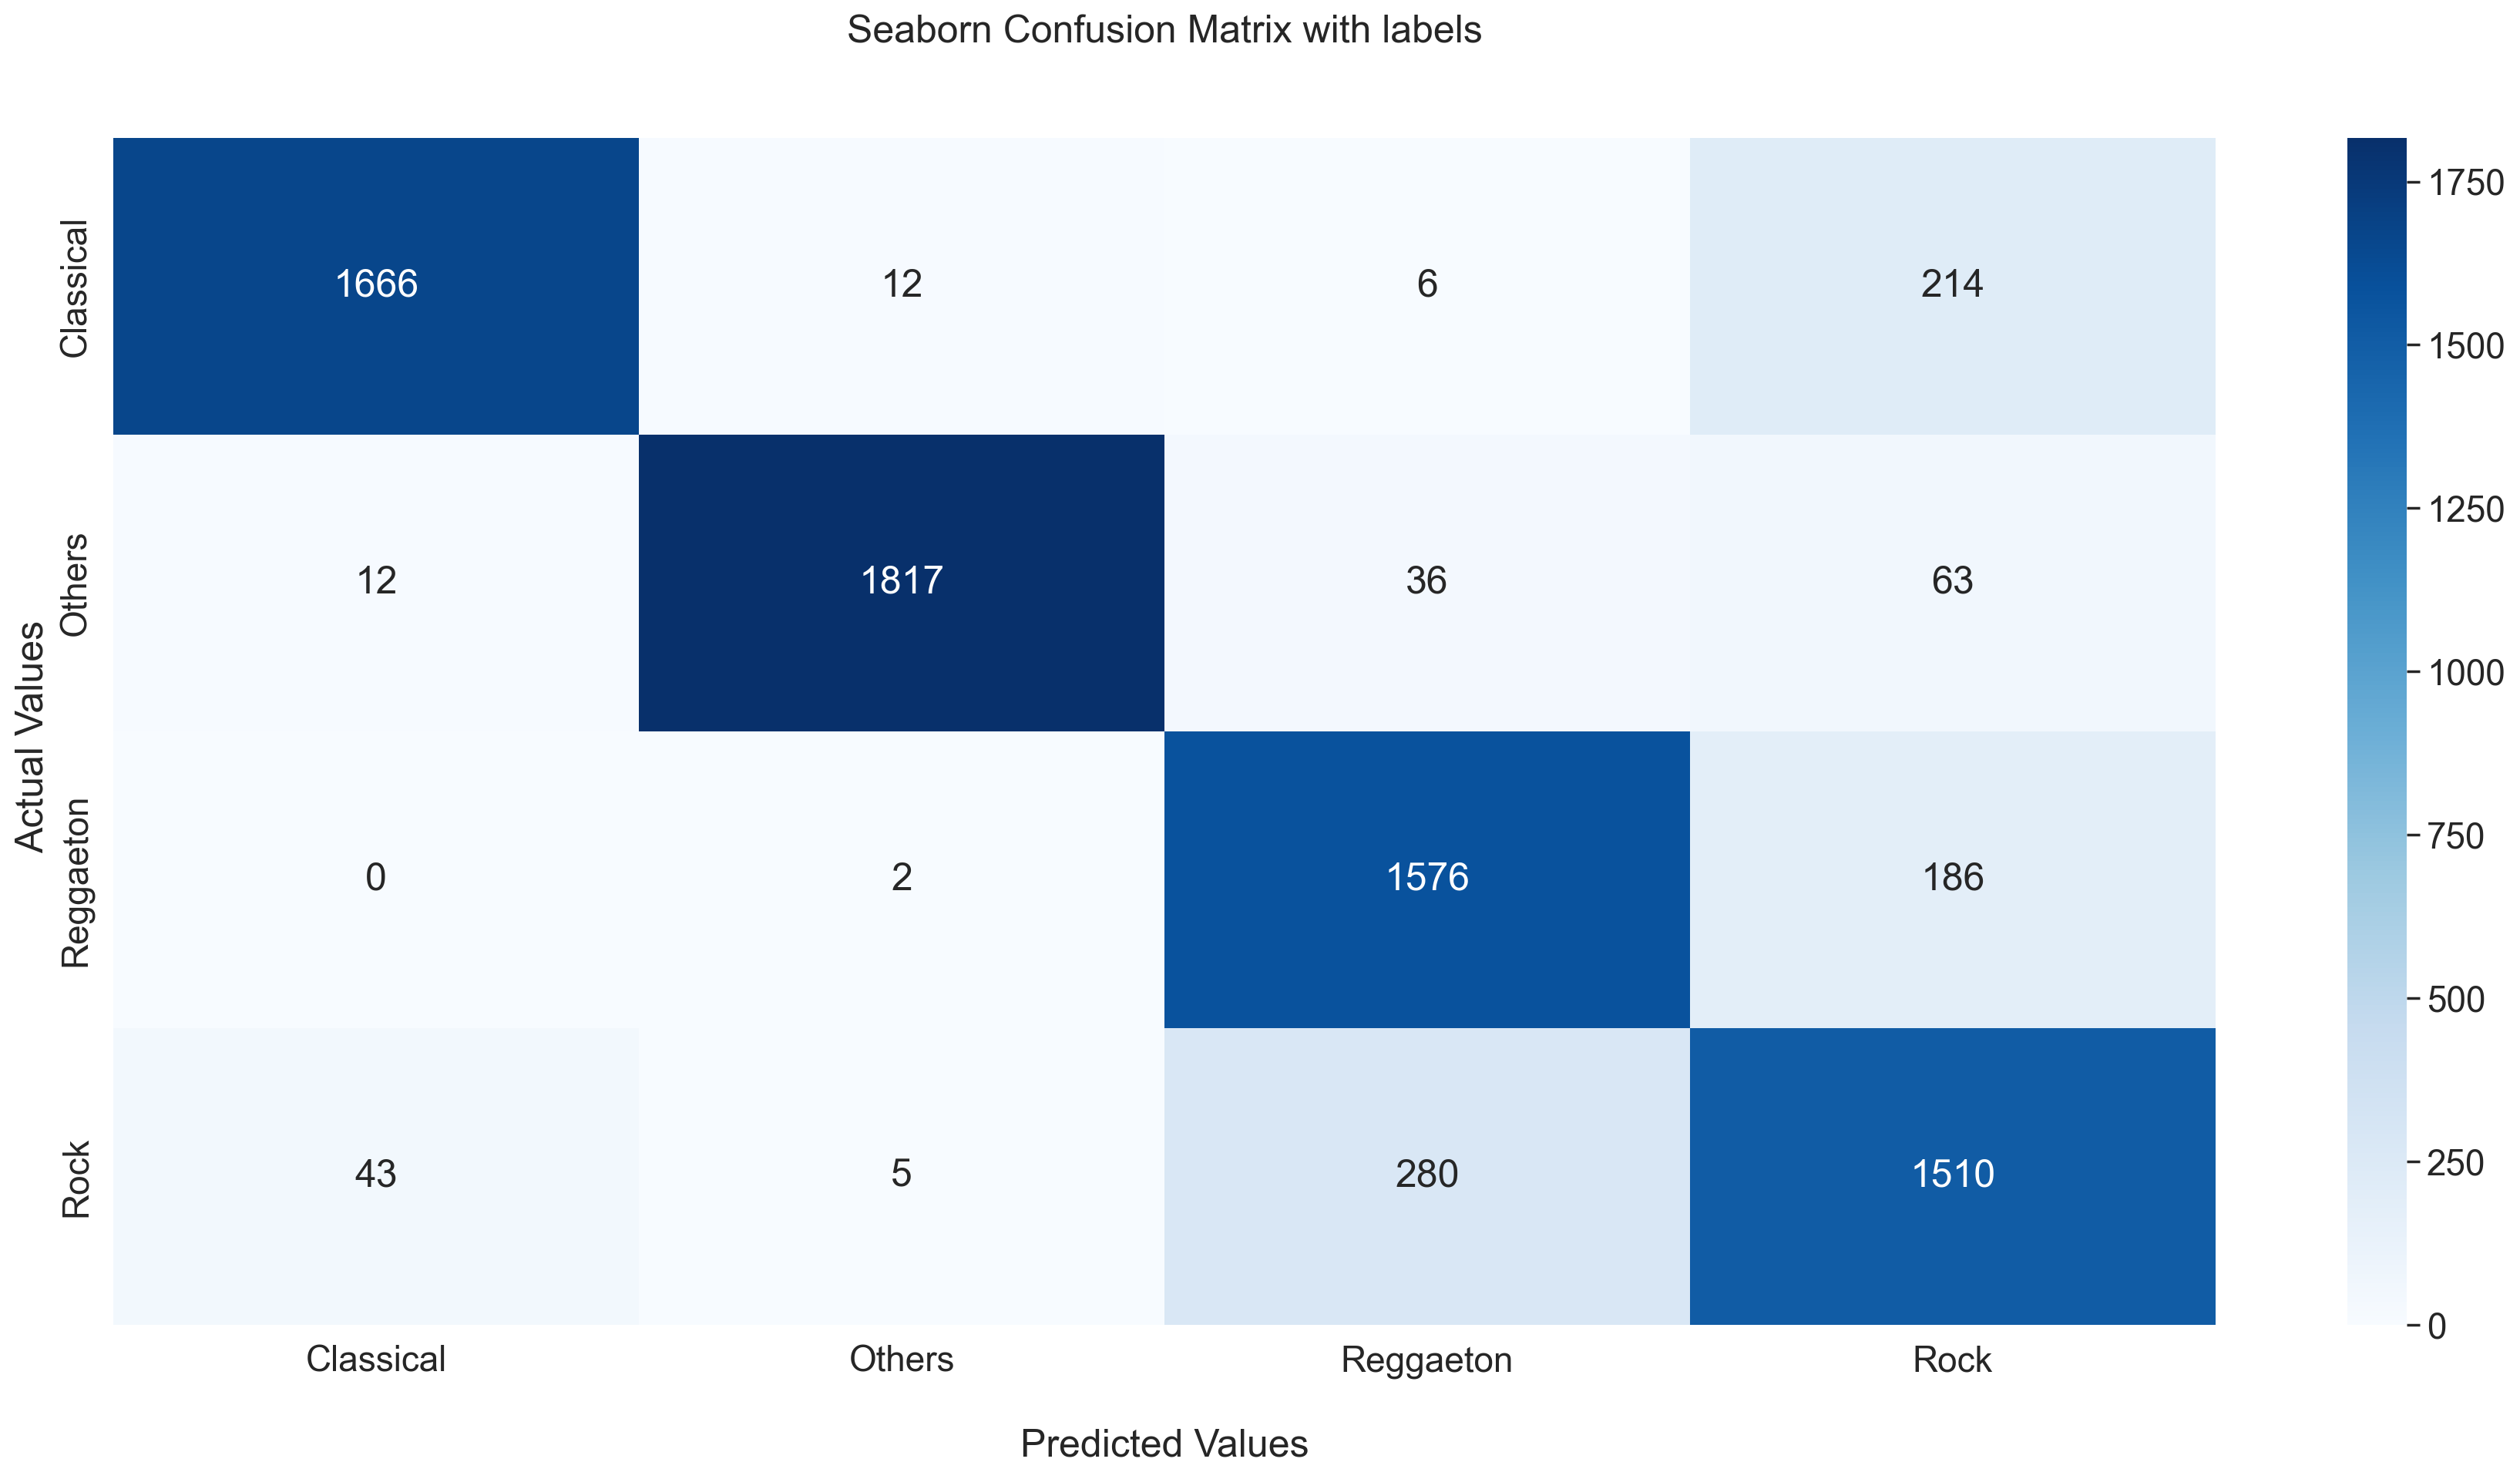

In [27]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([
    'Classical',
    'Others',
    'Reggaeton',
    'Rock',
    
])
ax.yaxis.set_ticklabels([
    'Classical',
    'Others',
    'Reggaeton',
    'Rock',
])

## Display the visualization of the Confusion Matrix.
plt.show()

In [28]:
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\jadge\appdata\local\programs\python\python312\lib\site-packages (1.33.0)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pickle
with open('music_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [30]:
model.save("music_genre_classifier.h5")